In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\Decision Trees')

In [3]:
df=pd.read_csv('HeartDisease.csv')
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
import matplotlib.pyplot as plt
import pylab as pl
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [31]:
bankloan=pd.read_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\Decision Trees\\bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.26,0.98,1
696,29,2,6,4,21,11.5,0.37,2.05,0
697,33,1,15,3,32,7.6,0.49,1.94,0
698,45,1,19,22,77,8.4,2.30,4.17,0


In [32]:
bankloan.shape

(700, 9)

In [33]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [34]:
b1=bankloan.iloc[:,[0,4,6,7,8]]
b1.shape

(700, 5)

In [35]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   income    700 non-null    int64  
 2   creddebt  700 non-null    float64
 3   othdebt   700 non-null    float64
 4   default   700 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 27.5 KB


In [36]:
X=b1.iloc[:,[0,1,2,3]]
X.shape

(700, 4)

In [37]:
Y=b1.iloc[:,4]
Y.shape

(700,)

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.4)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(420, 4)
(280, 4)
(420,)
(280,)


In [39]:
trn=ytrain.value_counts()
trn

0    302
1    118
Name: default, dtype: int64

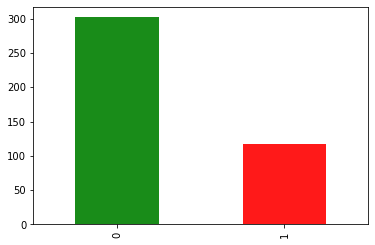

In [40]:
trn.plot.bar(color=('g','r'),alpha=0.9)
plt.show()

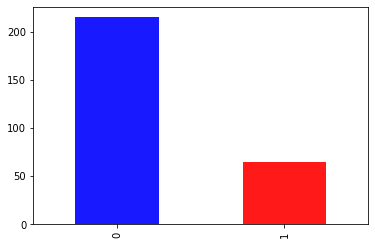

In [41]:
tst=ytest.value_counts()
tst.plot.bar(color=('b','r'),alpha=0.9)
plt.show()

In [42]:
clf=tree.DecisionTreeClassifier()
clffit=clf.fit(xtrain,ytrain)
print(clffit)

DecisionTreeClassifier()


[Text(231.19777644230768, 211.04470588235293, 'X[2] <= 5.56\ngini = 0.404\nsamples = 420\nvalue = [302, 118]'),
 Text(140.47247596153846, 198.25411764705882, 'X[0] <= 25.5\ngini = 0.386\nsamples = 406\nvalue = [300, 106]'),
 Text(46.14230769230769, 185.4635294117647, 'X[3] <= 1.185\ngini = 0.49\nsamples = 49\nvalue = [21, 28]'),
 Text(32.19230769230769, 172.6729411764706, 'X[3] <= 0.88\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(17.16923076923077, 159.88235294117646, 'X[3] <= 0.58\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(8.584615384615384, 147.09176470588235, 'X[2] <= 0.55\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(4.292307692307692, 134.30117647058825, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(12.876923076923077, 134.30117647058825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(25.753846153846155, 147.09176470588235, 'X[3] <= 0.695\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(21.46153846153846, 134.30117647058825, 'X[0] <= 23.5\ngini = 0

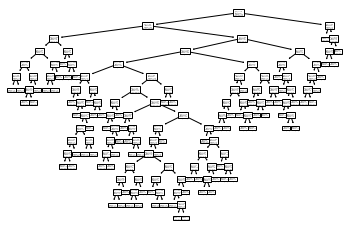

In [43]:
tree.plot_tree(clffit)

In [47]:
ypred=clffit.predict(xtest)
cm_tree=pd.crosstab(ytest,ypred,rownames=['Actual'],colnames=['Predicted'],margins=True)
cm_tree

Predicted,0,1,All
Actual,,,
0,162,53,215
1,33,32,65
All,195,85,280


In [48]:
confusion_matrix(ytest,ypred)

array([[162,  53],
       [ 33,  32]], dtype=int64)

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       215
           1       0.38      0.49      0.43        65

    accuracy                           0.69       280
   macro avg       0.60      0.62      0.61       280
weighted avg       0.73      0.69      0.71       280



In [50]:
predictprob=clffit.predict_proba(xtest)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(ytest,predictprob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.24651163 1.        ]
[0.         0.49230769 1.        ]
[2. 1. 0.]
